In [1]:
import os
from fastai.vision.all import *
from fastai.distributed import *
import cv2

In [2]:
path = Path('.')
img_files = glob.glob(os.path.join(str(path), '*.jpg'))

In [3]:
r= img_files[0]
img_name = r.split("/")[-1]
img_name = img_name.split("_")
print(img_name)

['.\\10000000', '0.85', '1.03e-10', '250.jpg']


In [4]:
from fastai.vision.all import *
import cv2
from fastai.distributed import *
import click, argparse
import warnings
warnings.filterwarnings('ignore')

def get_x(r):
    image = Image.open(r)
    image = image.convert('RGB')
    return tensor(image)

def get_y(r):
    last = r.split("/")[-1]
    d = last.split("_")
    d[0] = d[0].strip(".\\")
    d[-1] = d[-1].strip(".jpg")
    
    return tensor([float(d[0])])

def splitter(items):
    """
    Splitting the data between train and loss based on the  directory name. Another function can also be defined to split the data 
    """
    valid_idx = []
    for j,(img_path) in enumerate(items):
        valid_idx.append(False)
    return IndexSplitter(mask2idxs(valid_idx))(items)

dblock = DataBlock((ImageBlock, RegressionBlock),
                           get_x = get_x, get_y = get_y,
                           splitter = splitter,
                           batch_tfms=[*aug_transforms(size=(512,512)),
                                       Normalize.from_stats(*imagenet_stats)]) 

dsets = dblock.datasets(img_files)
dls = dblock.dataloaders(img_files, bs=1, shuffle=True,valid_pct=0.0,  drop_last=True )

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


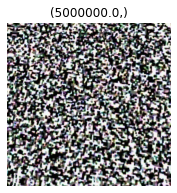

In [5]:
dls.show_batch()

In [18]:
learn = cnn_learner(dls, resnet34, metrics=[mse])# y_range[]